In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [244]:
class pixel():
    def __init__(self, i:int, j:int, value:int):
        self.i = i
        self.j = j
        self.value = value
        self.zone = 2 #0 = target region, 1 = frontière, 2 = source region

    def get_coord(self):
        return (self.i, self.j)

    def __str__(self):
        return "i: " + str(self.i) + " j: " + str(self.j) + " value: " + str(self.value) + " zone: " + str(self.zone)

In [245]:
class image():
    def __init__(self, filename:str):
        img = plt.imread(filename)
        self.width = img.shape[0]
        self.height = img.shape[1]
        self.pixels = self.convert_image(img)

    def convert_image(self,im):
        pixels = []
        for i in range(im.shape[0]):
            for j in range(im.shape[1]):
                pixels.append(pixel(i,j,im[i,j]))
        return pixels
    
    def get_pixel(self, i:int, j:int):
        return self.pixels[i*self.width + j]
    
    def set_pixel(self, i:int, j:int, value:int):
        self.pixels[i*self.width + j].value = value

    def show(self):
        img = np.zeros((self.width, self.height))
        for i in range(self.width):
            for j in range(self.height):
                img[i,j] = self.get_pixel(i,j).value
        plt.imshow(img, cmap='gray')
        plt.show()
        

In [246]:
class patch():
    def __init__(self, p:pixel, size:int):
        self.centre = p
        self.size = size #suppose patch carré et correspond a size*2+1 pixels
        self.confidence = 1
        self.data = 0
        self.priority = 0

    def __str__(self):
        return "centre: (" + str(self.centre) + ") size: " + str(self.size) + " confidence: " + str(self.confidence) + " data: " + str(self.data) + " priority: " + str(self.priority)

In [247]:
class patched_image():
    def __init__(self, im:image, size:int):
        self.width = im.width
        self.height = im.height
        self.patch_size = size
        self.patches = []
        for p in im.pixels:
            self.patches.append(patch(p,size))
        
    def get_patch(self, i:int, j:int):
        return self.patches[i*self.width + j]
    
    def get_pixel(self, i:int, j:int):
        return self.patches[i*self.width + j].centre
    
    def phip(self,i,j): #renvoie les pixels de la région de taille 2*patch_size+1 centrée en i,j
        pat = self.get_patch(i,j)
        pixels = []
        for k in range(i-pat.size,i+pat.size+1):
            for l in range(j-pat.size,j+pat.size+1):
                pixels.append(self.get_pixel(k,l))
        return pixels
    
    def compute_confidence(self,pat:patch):
        somme = 0
        for p in self.phip(pat.centre.i,pat.centre.j):
            if p.zone == 2:
                somme += self.get_patch(p.i,p.j).confidence
        res = somme/(self.patch_size*2+1)**2
        pat.confidence = res
        #return res
    
    def compute_data(self,pat:patch):
        #à faire
        pat.data = 1

    def compute_priority(self,pat:patch):
        pat.compute_confidence()
        pat.compute_data()
        pat.priority = pat.confidence * pat.data
    
    def show_patch(self, i:int, j:int):
        pat = self.get_patch(i,j)
        neigh = self.phip(i,j)
        img = []
        for p in neigh:
            img.append(p.value)
        img = np.array(img).reshape(pat.size*2+1,pat.size*2+1)
        plt.imshow(img, cmap='gray')
        plt.show()

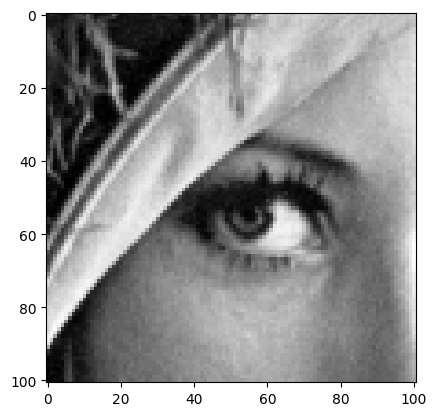

In [248]:
img = image("images/lena.tif")

image_patch = patched_image(img, size=50)

image_patch.show_patch(260,260)

<class '__main__.PatchedImage'>


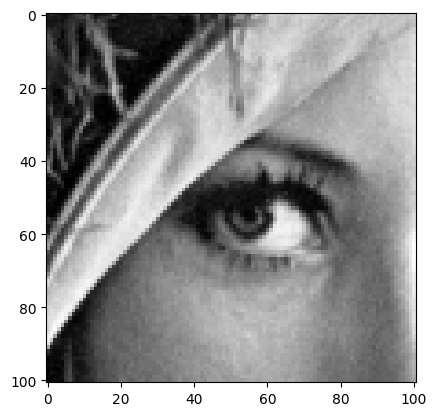

In [10]:
def gradient(ar):
    grad_i, grad_j = np.gradient(ar)
    return np.array([[(grad_i[i, j], grad_j[i, j]) for j in range(grad_i.shape[1])] for i in range(grad_j.shape[0])])

class PatchedImage():
    def __init__(self, filename, size):
        self.img = plt.imread(filename)
        self.size = size
        self.zone = self.set_zone() # Tout le patch doit etre dans la zone ?
        self.working_patch = (-1,-1)
        self.confidence = None
        grad_i, grad_j = np.gradient(self.img)
        self.gradient = np.array([[(grad_i[i, j], grad_j[i, j]) for j in range(grad_i.shape[1])] for i in range(grad_j.shape[0])])
    
    def set_zone(self):
        return np.zeros(self.img.shape)
    
    def set_priorities(self):
        if self.working_patch == (-1, -1):
            for i in range(self.length):
                for j in range(self.width):
                    if self.zone != 0:
                        self.set_confidence_patch(self, (i,j))
                        self.set_data_patch(self, (i,j))
        else:
            k,l = self.working_patch
            self.compute_confidence_patch(self, self.working_patch)
            self.compute_data_patch(self, self.working_patch)

    def set_confidence_patch(self,coord):
        k,l = coord
        somme = 0
        for i in range(k-self.size,k+self.size+1):
            for j in range(l-self.size,l+self.size+1):
                if self.zone[i,j] == 2:
                    somme += self.confidence[i,j]
        res = somme/(self.size*2+1)**2
        self.confidence[coord] = res
        #return res

    def set_gradient_patch(self, coord):
        k,l = coord
        self.gradient[k-self.size:k+self.size+1,l-self.size:l+self.size+1] = gradient(self.img[k-self.size:k+self.size+1,l-self.size:l+self.size+1])

    def set_data_patch(self,coord):
        i,j = coord
        
        gradient = np.gradient(self.img[i-1:i+2,j-1:j+2])
        grad_patch = np.array([gradient[0][1,1],gradient[1][1,1]])

        pat.data = 1

    def show_patch(self, coord):
        i,j = coord
        img = self.img[i-self.size:i+self.size+1,j-self.size:j+self.size+1]
        plt.imshow(img, cmap='gray')
        plt.show()


# Exemple d'utilisation
patch_instance = PatchedImage("images/lena.tif",50)

print(type(patch_instance))  # Devrait afficher <class '__main__.Patch'>
print(patch_instance)  # Affiche les dimensions de l'image
patch_instance.show_patch((260,260))  # Affiche le patch centré en (260,260)

